# Project Baseball

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [2]:
baseball=pd.read_csv('baseball.csv.txt')
baseball.columns =['Wins','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts','Stolen Bases',
             'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)','CG', 'Shutouts', 'Saves',  'Errors'] 
baseball

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# EDA Process
baseball.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [4]:
# check null values 
baseball.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
CG                          0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [5]:
# Lets Check Outliers in the Dataset 
df=pd.DataFrame(data=baseball)
from scipy.stats import zscore
print('Before zscore',df.shape)
z_score=abs(zscore(df))
df=df.iloc[(z_score<3).all(axis=1)]
print('After zscore',df.shape)


Before zscore (30, 17)
After zscore (29, 17)


In [6]:
# correltion between the data
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),CG,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
At Bats,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
Hits,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
Doubles,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
Triples,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
Homeruns,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Walks,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
Strikeouts,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
Stolen Bases,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


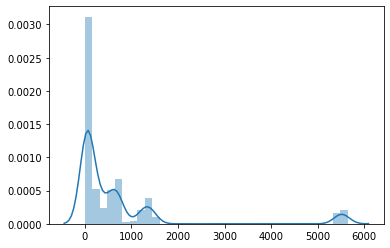

In [7]:
#check distribution 
sns.distplot(df)

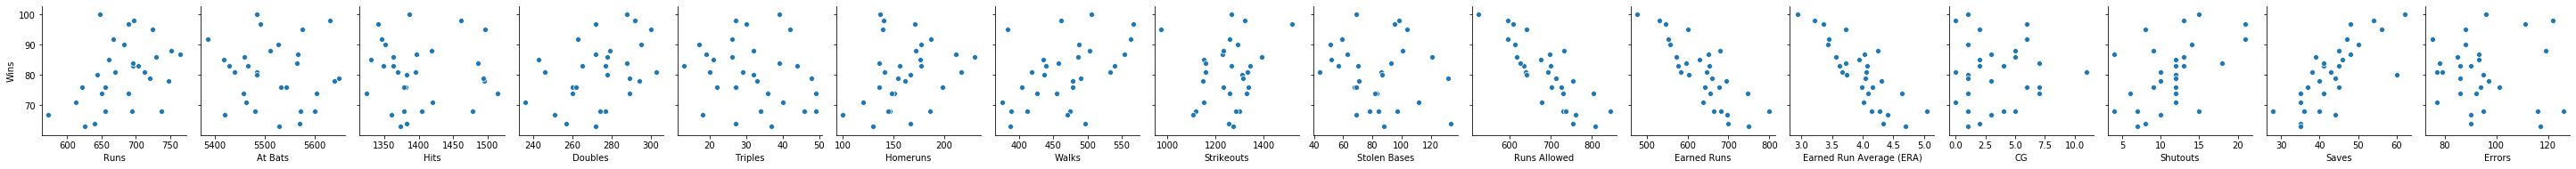

In [16]:
sns.pairplot(df, x_vars=['Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'CG', 'Shutouts', 'Saves', 'Errors'], y_vars='Wins')

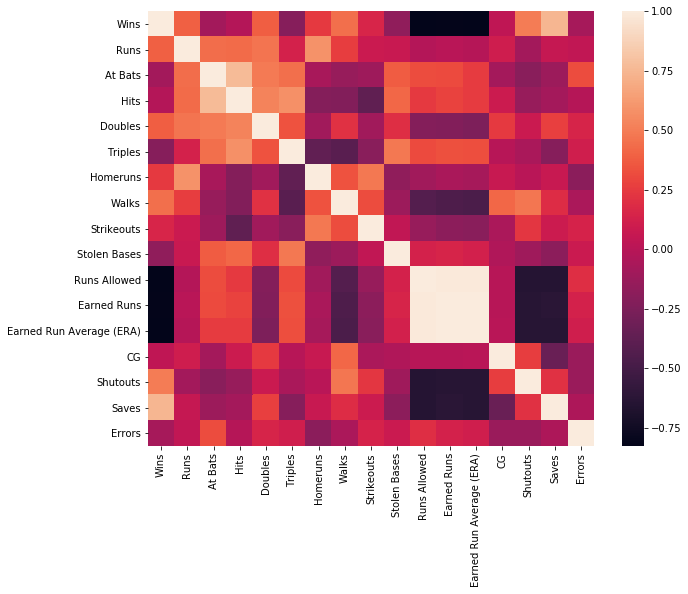

In [17]:
# Correlation between data
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
#due to percentage and less data not performing  outlier 
# preparing dependent (target) and independent variables i,e; x,y 
x=df.iloc[:,1:]
y=df.iloc[:,0]
y=np.array(y).reshape(-1,1)

In [24]:
print(x.shape)
print(y.shape)

(29, 16)
(29, 1)


In [55]:
#  findout random_state for LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state   
        print("max r2 score corresponding to",final_r_state," is ",max_r_score)
            







max r2 score corresponding to 42  is  0.25928395352745615
max r2 score corresponding to 44  is  0.45588267886538814
max r2 score corresponding to 46  is  0.6086791076001017
max r2 score corresponding to 50  is  0.8402586950388365
max r2 score corresponding to 64  is  0.8556290952095715


In [56]:
# splitting data as X_train and X_test
# max random_state=64 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 64)

In [57]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_pred = regressor.predict(X_test)

In [59]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

4.1079623475437

In [60]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,71,63.546616
1,64,60.450694
2,76,74.863361
3,85,81.819723
4,98,95.095106
5,76,79.641031


In [61]:
# we can make best prediction and RMSE using PCA
# get best correlation data from x using PCA
# GET the best components for PCA using  GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
n={"n_components":range(1,17)}
pcv=GridSearchCV(pca,n,cv=10)
pcv.fit(x,y)
pcv.best_params_

{'n_components': 8}

In [62]:
# Apply the PCA
pca=PCA(n_components=8)
px=pca.fit_transform(x)
px.shape

(29, 8)

In [63]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=r_state,test_size=0.2)
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state   
        print("max r2 score corresponding to",final_r_state," is ",max_r_score)
            

max r2 score corresponding to 42  is  0.4362937989389861
max r2 score corresponding to 46  is  0.7901125960680577
max r2 score corresponding to 47  is  0.8570096783408017
max r2 score corresponding to 69  is  0.8711418817547232
max r2 score corresponding to 75  is  0.9357075788769983


In [64]:
# max random_state=75 
pX_train, pX_test, py_train, py_test = train_test_split(px, y, test_size = 0.2,random_state = 75)

In [69]:
PCAReg = LinearRegression()  
PCAReg.fit(pX_train, py_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
py_pred = PCAReg.predict(pX_test)

In [71]:
# calculating RMSE
rmse = sqrt(mean_squared_error(py_test, py_pred))
rmse

2.947610278605193

In [72]:
pdf = pd.DataFrame({'Actual': np.array(py_test)[:,0], 'Predicted': py_pred[:,0]})
pdf

,Actual,Predicted
0,83,79.791279
1,71,75.328241
2,76,74.813562
3,87,83.698369
4,64,66.282140
5,100,97.636885


In [73]:

# Saving the best Model After PCA model performance has been imporve 
from sklearn.externals import joblib
joblib.dump(PCAReg,'PCABaseball')
OuModel=joblib.load('PCABaseball')
OuModel.predict(pX_test)

array([[79.79127901],
       [75.32824068],
       [74.81356166],
       [83.69836881],
       [66.28213987],
       [97.63688479]])